# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.


### Importing libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import nltk
import random
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
from textblob import TextBlob

### Scraping data from Skytrax

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | My family and I have flown ...
1,✅ Trip Verified | This has been by far the wo...
2,✅ Trip Verified | In Nov 2022 I booked and pa...
3,Not Verified | BA is not treating its premium ...
4,✅ Trip Verified | 24 hours before our departu...


### Create Word Cloud

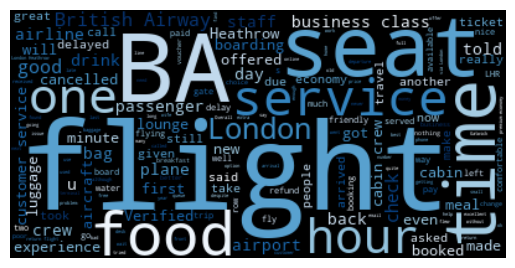

In [16]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.reviews)
word = "Trip Verified"
textt = re.sub(r'\b%s\b' % word, '', textt)
wordcloud = WordCloud(stopwords=stopwords, colormap="Blues").generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

### Sentiments polarity

In [10]:
# Calculate the sentiment polarity for each review
for i in range(len(df)):
    review = df.loc[i, "reviews"]
    blob = TextBlob(review)
    df.loc[i, "sentiment_polarity"] = blob.sentiment.polarity

# Print the sentiment polarity for each review
print(df)

                                               reviews  row_id  \
0    ✅ Trip Verified |  My family and I have flown ...       1   
1    ✅ Trip Verified |  This has been by far the wo...       2   
2    ✅ Trip Verified |  In Nov 2022 I booked and pa...       3   
3    Not Verified | BA is not treating its premium ...       4   
4    ✅ Trip Verified |  24 hours before our departu...       5   
..                                                 ...     ...   
995  Not Verified |  Glasgow to Miami via London. G...     996   
996  ✅ Trip Verified |  London Heathrow to Budapest...     997   
997  ✅ Trip Verified |  Budapest to London Heathrow...     998   
998  ✅ Trip Verified |  London to Toronto. Group of...     999   
999  ✅ Trip Verified |  Madrid to Heathrow. I fly w...    1000   

     sentiment_polarity  
0              0.125269  
1             -0.082212  
2              0.080073  
3              0.000000  
4             -0.032217  
..                  ...  
995            0.173299  

In [11]:
# Count the number of neutral, positive, and negative reviews
neutral_reviews = 0
positive_reviews = 0
negative_reviews = 0
for i in range(len(df)):
    sentiment = df.loc[i, "sentiment_polarity"]
    if sentiment == 0:
        neutral_reviews += 1
    elif sentiment > 0:
        positive_reviews += 1
    elif sentiment < 0:
        negative_reviews += 1

# Print the number of neutral, positive, and negative reviews
print("Number of neutral reviews:", neutral_reviews)
print("Number of positive reviews:", positive_reviews)
print("Number of negative reviews:", negative_reviews)

Number of neutral reviews: 10
Number of positive reviews: 650
Number of negative reviews: 340


In [15]:
# Get the indices of the negative reviews
negative_review_indices = []
for i in range(len(df)):
    if df.loc[i, "sentiment_polarity"] < 0:
        negative_review_indices.append(i)

# Randomly select 3 negative reviews
random_negative_review_indices = random.sample(negative_review_indices, 3)

# Print the 3 random negative reviews
for i in random_negative_review_indices:
    print(df.loc[i, "reviews"])

✅ Trip Verified |  I tried to check in on line and was informed that this was not possible. I was given no reason for this. I telephoned BA customer service and must have wasted nearly 2 hours being given wrong phone numbers and incorrect information. Staff need customer training, better knowledge of their product, and some manners. BA customer service was virtually non existent. I will never fly with them again.
✅ Trip Verified |  Doha to London Heathrow. Flight on time, not completely full, had an aisle seat near back of plane without the entertainment box in the way. Some reviews say that the last few windows are blanked off at rear of the aircraft but not so on this plane. Breakfast was served which was OK. Cabin crew mixed, mostly young and worked quickly. Crew uniform still looks a bit tatty compared with rivals in this part of the world. There is good and bad still with BA - bad was the so called chicken wrap served just before arrival - leathery and inedible - why do they let t

### Get topic words and their occurences

In [91]:

# Load the stopwords
stopwords = stopwords.words('english')
stopwords.append('verified')
stopwords.append('ba')
stopwords.append('one')


# Preprocess the reviews data
df['clean_reviews'] = df['reviews'].str.replace('[^a-zA-Z]', ' ').str.lower()

# Initialize the vectorizer with stopwords
vectorizer = CountVectorizer(stop_words=stopwords)

# Convert the preprocessed reviews into a matrix of token counts
X = vectorizer.fit_transform(df['clean_reviews'])

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Sum the token counts for each feature across all reviews
feature_counts = X.sum(axis=0).A1

# Create a dictionary to store the feature names and their corresponding counts
feature_dict = dict(zip(feature_names, feature_counts))

# Sort the features based on their counts in descending order
sorted_features = sorted(feature_dict.items(), key=lambda x: x[1], reverse=True)

# Print or visualize the top features and their counts, excluding stopwords
for feature, count in sorted_features[:10]:
    if feature not in stopwords:
        print(feature, count)

flight 1836
trip 926
service 711
london 606
seat 515
time 484
food 469
crew 454
good 419
seats 415


In [5]:
df.to_csv("BA_reviews.csv")